 # Лабораторная работа 2. Обучение без учителя

Результат лабораторной работы − отчет в формате Jupyter notebook'а. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: мне − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

## Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 20 баллов
* При сдаче до soft deadline можно получить максимум 100% баллов
* При просрочке не более, чем на 5 минут — максимум 90% баллов
* При просрочке не более, чем на 1 час — максимум 80% баллов
* При сдаче до hard deadline — максиму 70% баллов
* Сдавать задание после hard deadline нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

## Кластеризация

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на кластеры, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты.

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров вычисляется кластеризация и выбирается то количество кластеров, начиная с которого качество "стабилизируется".

### Метрики качества

При оценивании качества кластеризации следует учитывать такие факты как:
 - объекты одного кластера должны быть более похожи, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать абсолютные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 - [Homogeneity, completeness and V-measure](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)
 - [Fowlkes-Mallows scores](https://scikit-learn.org/stable/modules/clustering.html#fowlkes-mallows-scores)
 
### Кластеризация изображений

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения.

**Задание 1. (1 балл)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 

- Подберите оптимальное число кластеров (см. пункт "Выбор числа кластеров")
- Рассмотрите различные способы выбора начального приближения (параметр *init*)
- Визуализируйте изображения, соответствующие центроидам лучшей кластеризации
- Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить почему так произошло?

In [ ]:
import numpy as np

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
data = datasets.load_digits()
X = data['data']
labels_true = data['target']

# shuffling
p = np.random.permutation(X.shape[0])
X = X[p]
labels_true = labels_true[p]

print(X.shape, labels_true.shape)
print(X[0])
print(labels_true[:10])
print(np.unique(labels_true))

(1797, 64) (1797,)
[ 0.  0. 13. 14.  3.  0.  0.  0.  0.  4. 16. 15. 11.  0.  0.  0.  0.  7.
 12.  4. 16.  0.  0.  0.  0.  3.  6.  4. 16.  0.  0.  0.  0.  0.  0.  9.
 12.  0.  0.  0.  0.  0.  1. 14.  7.  0.  0.  0.  0.  1. 14. 16. 10. 10.
  2.  0.  0.  0. 11. 12. 14. 14.  6.  0.]
[2 8 1 6 1 7 1 6 6 6]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [ ]:
# searching for best k
# we'll see on amount of clusters higher then 10 as we assume that we don't know that it is digits

adj_scores = []
v_scores = []
fm_scores = []

min_clusters = 2
max_clusters = 25

for k in tqdm(range(min_clusters, max_clusters + 1)):
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  labels_pred = kmeans.labels_

  adj_scores.append(metrics.adjusted_rand_score(labels_true, labels_pred))
  v_scores.append(metrics.v_measure_score(labels_true, labels_pred))
  fm_scores.append(metrics.fowlkes_mallows_score(labels_true, labels_pred))

In [ ]:
def metrics_speed(metr):
  metr = np.array(metr)
  return np.abs(metr[1:-1] - metr[2:]) / np.abs(metr[:-2] - metr[1:-1])

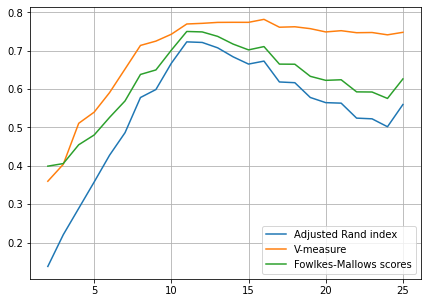

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(range(min_clusters, max_clusters + 1), adj_scores)
plt.plot(range(min_clusters, max_clusters + 1), v_scores)
plt.plot(range(min_clusters, max_clusters + 1), fm_scores)
plt.legend(['Adjusted Rand index', 'V-measure', 'Fowlkes-Mallows scores'])
plt.grid()
plt.show()

Посмотрев на этот график, в качестве параметра n_clusters можно выбрать значение 12, так как это значения, которое дает нас максимум метрики. Также после значения n_clusters = 12 качество кластеризации начинает заметно падать и скакать.

In [ ]:
print(f'Adjusted Rand index : max = {np.max(adj_scores):.5f}, n_clusters = {np.argmax(adj_scores) + 2}.')
print(f'V-measure: max = {np.max(v_scores):.5f}, n_clusters = {np.argmax(v_scores) + 2}.')
print(f'Fowlkes-Mallows scores: max = {np.max(fm_scores):.5f}, n_clusters = {np.argmax(fm_scores) + 2}.')

Adjusted Rand index : max = 0.72304, n_clusters = 11.
V-measure: max = 0.78168, n_clusters = 16.
Fowlkes-Mallows scores: max = 0.75011, n_clusters = 11.


Смотрим на график скорости изменения метрики. Видим, что после значения n_clusters = 10 скорость начинает сильно скакать.

In [ ]:
adj_speed = metrics_speed(adj_scores)
v_speed = metrics_speed(v_scores)
fm_speed = metrics_speed(fm_scores)

print(f'Adjusted Rand index speed: min = {np.min(adj_speed):.5f}, n_clusters = {np.argmin(adj_speed) + 2}.')
print(f'V-measure speed: min = {np.min(v_speed):.5f}, n_clusters = {np.argmin(v_speed) + 2}.')
print(f'Fowlkes-Mallows scores speed: min = {np.min(fm_speed):.5f}, n_clusters = {np.argmin(fm_speed) + 2}.')

Adjusted Rand index speed: min = 0.02733, n_clusters = 10.
V-measure speed: min = 0.05680, n_clusters = 16.
Fowlkes-Mallows scores speed: min = 0.00599, n_clusters = 16.


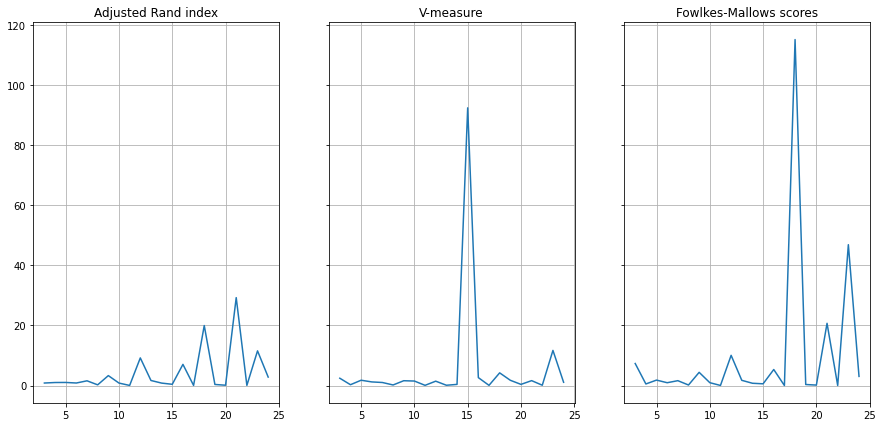

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
axes[0].plot(range(min_clusters + 1, max_clusters), adj_speed)
axes[0].set_title('Adjusted Rand index')
axes[0].grid()
axes[1].plot(range(min_clusters + 1, max_clusters), v_speed)
axes[1].set_title('V-measure')
axes[1].grid()
axes[2].plot(range(min_clusters + 1, max_clusters), fm_speed)
axes[2].set_title('Fowlkes-Mallows scores')
axes[2].grid()
plt.show()

In [ ]:
init_params = ['k-means++', 'random']
for init_param in init_params:
  kmeans = KMeans(n_clusters=12, init=init_param, random_state=42).fit(X)
  labels_pred = kmeans.labels_

  print(init_param)
  print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels_pred):.5f}.')
  print(f'V-measure speed: {metrics.v_measure_score(labels_true, labels_pred):.5f}.')
  print(f'Fowlkes-Mallows scores speed: {metrics.fowlkes_mallows_score(labels_true, labels_pred):.5f}.')
  print()

k-means++
Adjusted Rand index: 0.72151.
V-measure speed: 0.77131.
Fowlkes-Mallows scores speed: 0.74895.

random
Adjusted Rand index: 0.71749.
V-measure speed: 0.76703.
Fowlkes-Mallows scores speed: 0.74534.



И по фото-финишу инициализация 'k-means++' вырывается вперед, обогнав 'random' в сотые доли метрики!

In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=0).fit(X)

In [ ]:
centers = kmeans.cluster_centers_

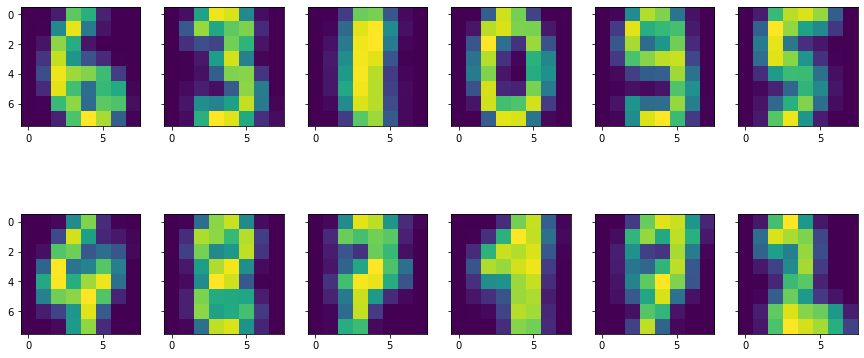

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(15, 7), sharey=True)

i = 0
for center in centers:
  axes[i//6, i%6].imshow(center.reshape(8, 8))
  i += 1

В центрах кластеров можно четко увидеть цифры: 0, 8, 6, 5, 4, 3.
Можно увидеть два кластера 1 и еще два для 7. И, вероятно, кластер для 2 и кластре для 9.

In [ ]:
clusters = dict()
for ind, (true, pred) in enumerate(zip(labels_true, labels_pred)):
  clusters.setdefault(pred, [])
  clusters[pred].append([ind, pred, true])

In [ ]:
def analize_cluster(X, clusters, cluster_label):
  labels = np.array(clusters[cluster_label])[:, 2]
  trues = np.unique(labels)
  print(trues)

  parts = []
  for true in trues:
    parts.append(np.count_nonzero(labels == true) / len(labels))
  
  print(parts)
  print(f'Cluster number -> {trues[np.argmax(parts)]}')
  return trues[np.argmax(parts)]

In [ ]:
analize_cluster(X, clusters, 0)
analize_cluster(X, clusters, 1)
analize_cluster(X, clusters, 2)
analize_cluster(X, clusters, 3)
analize_cluster(X, clusters, 4)
analize_cluster(X, clusters, 5)
analize_cluster(X, clusters, 6)
analize_cluster(X, clusters, 7)
analize_cluster(X, clusters, 8)
analize_cluster(X, clusters, 9)
print()

[1 2 4 6 7 8]
[0.746268656716418, 0.007462686567164179, 0.03731343283582089, 0.022388059701492536, 0.08955223880597014, 0.09701492537313433]
Cluster number -> 1
[0 4 5]
[0.006060606060606061, 0.9878787878787879, 0.006060606060606061]
Cluster number -> 4
[1 5 6 8]
[0.011111111111111112, 0.005555555555555556, 0.9777777777777777, 0.005555555555555556]
Cluster number -> 6
[1 2 3 8]
[0.13793103448275862, 0.8390804597701149, 0.005747126436781609, 0.017241379310344827]
Cluster number -> 2
[2 3 4 7 8 9]
[0.010810810810810811, 0.02702702702702703, 0.02702702702702703, 0.8810810810810811, 0.010810810810810811, 0.043243243243243246]
Cluster number -> 7
[1 2 4 8 9]
[0.6206896551724138, 0.022988505747126436, 0.05747126436781609, 0.06896551724137931, 0.22988505747126436]
Cluster number -> 1
[1 2 3 5 9]
[0.005917159763313609, 0.0650887573964497, 0.9053254437869822, 0.005917159763313609, 0.01775147928994083]
Cluster number -> 3
[0 2 6]
[0.9888268156424581, 0.00558659217877095, 0.00558659217877095]
Clu

In [ ]:
min_clusters = 5
max_clusters = 15

for k in tqdm(range(min_clusters, max_clusters + 1)):
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  labels_pred = kmeans.labels_

  clusters = dict()
  for ind, (true, pred) in enumerate(zip(labels_true, labels_pred)):
    clusters.setdefault(pred, [])
    clusters[pred].append([ind, pred, true])

  cluster_to_digit = {clst : analize_cluster(X, clusters, clst) for clst in clusters.keys()}

  not_in_good_cluster = set(range(len(X)))
  for clst, obj in clusters.items():
    for ind, el_pred, el_true in obj:
      if ind in not_in_good_cluster and cluster_to_digit[el_pred] == el_true:
        not_in_good_cluster.remove(ind)

Выберем рандомные цифры, которые не совпадают с мажоритарным класс в кластере, и визуализируем их.

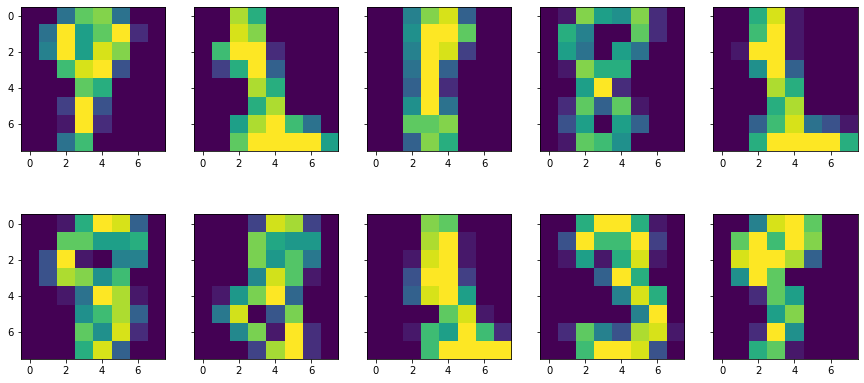

In [ ]:
import random

fig, axes = plt.subplots(2, 5, figsize=(15, 7), sharey=True)

i = 0
random.seed(a=42, version=2)
for dig in X[random.sample(not_in_good_cluster, 10)]:
  axes[i//5, i%5].imshow(dig.reshape(8, 8))
  i += 1

Как мы видим, все эти цифры написаны как-то криво косо. Например, вроде как 9 справа снизу, но возможно и 3, или 1.

**Задание 2. (1 балл)** Кластеризуйте изображения при помощи алгоритма [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

Подберите параметры min_samples и eps, используя следующий метод (или его вариацию):

* Выберите min_samples и прокомментируйте свой выбор
* Вычислите среднее расстояние по min_samples ближайшим соседям для каждой точки
* Отсортируйте полученные на предыдушем шаге значения по возрастанию и визуализируйте
* Выберите eps из области с максимальной кривизной на графике из предыдущего пункта

Оцените качество полученной кластеризации и сравните его с качеством полученным при использовании KMeans.


In [ ]:
from sklearn.cluster import DBSCAN

# searching for best min_samples
adj_scores = []
v_scores = []
fm_scores = []

min_num = 1
max_num = 50

for min_samples in tqdm(range(min_num, max_num + 1)):
  dbscan = DBSCAN(min_samples=min_samples).fit(X)
  labels_pred = dbscan.labels_

  adj_scores.append(metrics.adjusted_rand_score(labels_true, labels_pred))
  v_scores.append(metrics.v_measure_score(labels_true, labels_pred))
  fm_scores.append(metrics.fowlkes_mallows_score(labels_true, labels_pred))

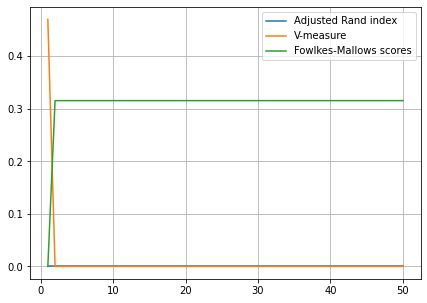

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(range(min_num, max_num + 1), adj_scores)
plt.plot(range(min_num, max_num + 1), v_scores)
plt.plot(range(min_num, max_num + 1), fm_scores)
plt.legend(['Adjusted Rand index', 'V-measure', 'Fowlkes-Mallows scores'])
plt.grid()
plt.show()

По графику получается, что нам надо выбрать min_samples=2.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def get_distance_for_core_obj(X, min_samples=5):
  dist = euclidean_distances(X)
  cores = np.argsort(dist, axis=1)[:, 1:(min_samples+1)]
  mean_dist = []
  
  for inds, d in zip(cores, dist):
    mean_dist.append(d[inds].mean())
  
  return mean_dist

In [ ]:
 mean_dist = get_distance_for_core_obj(X, 5)

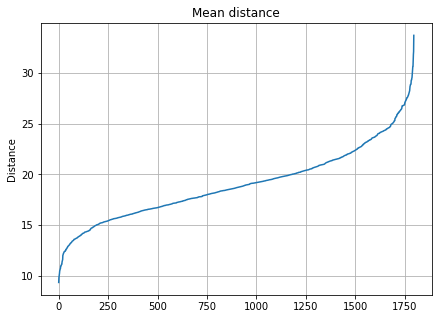

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(np.sort(mean_dist))
plt.title('Mean distance')
plt.ylabel('Distance')
plt.grid()
plt.show()

Найдем точку перегиба. Рассмотрим отрезок: [1000, 1250].


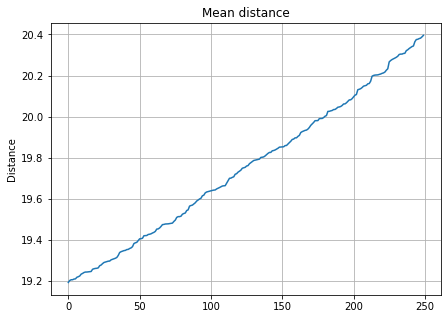

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(np.sort(mean_dist)[1000:1250])
plt.title('Mean distance')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [ ]:
eps = np.sort(mean_dist)[1150]
eps

19.85294362908308

In [ ]:
dbscan = DBSCAN(min_samples=2, eps=eps).fit(X)
labels_pred = dbscan.labels_

print(metrics.fowlkes_mallows_score(labels_true, labels_pred))

0.6488813024277471


**Задание 3. (1 балл)** 

- Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) для сокращения размерности векторного представления до 2-х и визуализируйте кластеры
- Подайте полученные представления объектов на вход алгоритмам [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и визуализируйте кластеры, выделленные каждым алгоритмом
- Сравните новые и предыдущие результаты. Нашлась ли пара "представление"—"алгоритм", превосходящая другие по всем метрикам?
- Являются ли все метрики согласованными? Можете ли вы объяснить почему?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
def plot_results(X, labels, title, legend=None):
  plt.figure(figsize=(7, 5))
  plt.scatter(X[:, 0], X[:, 1], c=labels)
  plt.title(title)
  if legend:
    plt.legend()
  plt.show()

***PCA:***

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42).fit(X_pca)
labels = kmeans.labels_

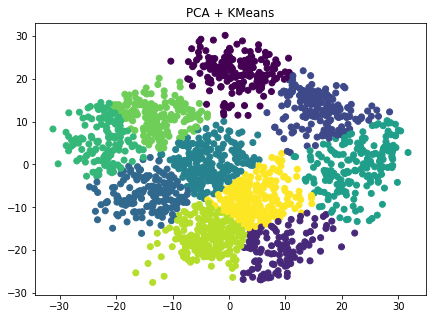

Adjusted Rand index: 0.39422.
V-measure speed: 0.52980.
Fowlkes-Mallows scores speed: 0.45551.


In [ ]:
plot_results(X_pca, labels, 'PCA + KMeans')
print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels):.5f}.')
print(f'V-measure speed: {metrics.v_measure_score(labels_true, labels):.5f}.')
print(f'Fowlkes-Mallows scores speed: {metrics.fowlkes_mallows_score(labels_true, labels):.5f}.')

1.810823829386856


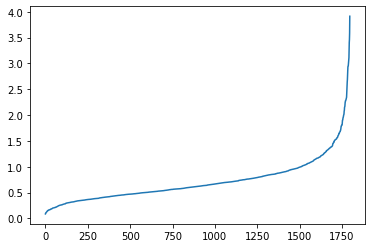

In [ ]:
mean_dist = get_distance_for_core_obj(X_pca, 2)
print(np.sort(mean_dist)[1750])
plt.plot(np.sort(mean_dist))

In [ ]:
dbscan = DBSCAN(min_samples=2, eps=1.8).fit(X_pca)
labels = dbscan.labels_

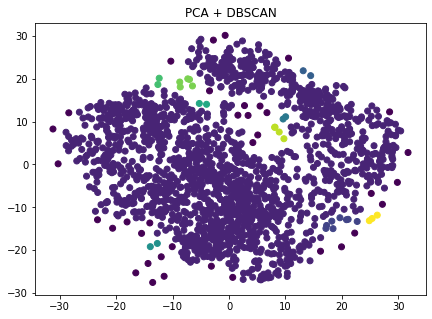

Adjusted Rand index: 0.00013.
V-measure speed: 0.03117.
Fowlkes-Mallows scores speed: 0.30413.


In [ ]:
plot_results(X_pca, labels, 'PCA + DBSCAN')
print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels):.5f}.')
print(f'V-measure speed: {metrics.v_measure_score(labels_true, labels):.5f}.')
print(f'Fowlkes-Mallows scores speed: {metrics.fowlkes_mallows_score(labels_true, labels):.5f}.')

***TSNE***:

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000)
X_tsne = tsne.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42).fit(X_tsne)
labels = kmeans.labels_

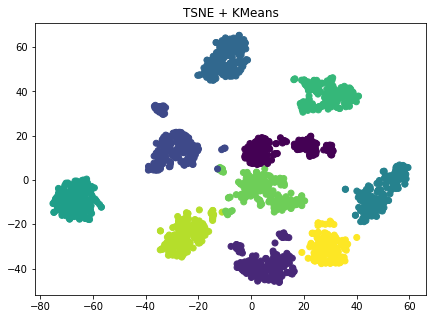

Adjusted Rand index: 0.89688.
V-measure speed: 0.91767.
Fowlkes-Mallows scores speed: 0.90717.


In [ ]:
plot_results(X_tsne, labels, 'TSNE + KMeans')
print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels):.5f}.')
print(f'V-measure speed: {metrics.v_measure_score(labels_true, labels):.5f}.')
print(f'Fowlkes-Mallows scores speed: {metrics.fowlkes_mallows_score(labels_true, labels):.5f}.')

In [ ]:
dbscan = DBSCAN(min_samples=2, eps=1.8).fit(X_tsne)
labels = dbscan.labels_

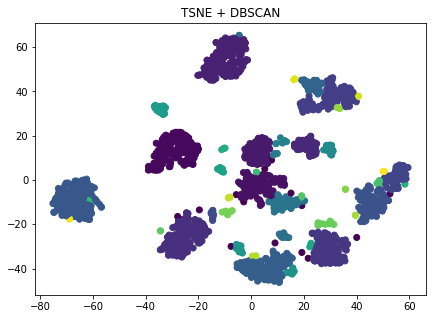

Adjusted Rand index: 0.77330.
V-measure speed: 0.85945.
Fowlkes-Mallows scores speed: 0.80801.


In [ ]:
plot_results(X_tsne, labels, 'TSNE + DBSCAN')
print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels):.5f}.')
print(f'V-measure speed: {metrics.v_measure_score(labels_true, labels):.5f}.')
print(f'Fowlkes-Mallows scores speed: {metrics.fowlkes_mallows_score(labels_true, labels):.5f}.')

Отлично отработал TSNE + KMEANS с заранее заданными 10 кластерами. К сожалению, DBSCAN плохо отработал на PCA. И визуально DBSCAN плохо определяет кластеры для TSNE, но при этом метрика FM у него выше, чем на не предобработанных данных.

**Задание 4. (0.5 балла)** Ответьте на следующие вопросы:
* В чём преимущества и недостаки каждого из рассмотренных алгоритмов кластеризации? Ответ обоснуйте.
* Приведите примеры данных, для которых использование каждого из алгоритмов будет наиболее обосновано с точки зрения качества и/или производительности. (будет достаточно описать какими должны быть данные, приводить примеры конкретных датасетов не нужно)



*   KMeans: Приятный в использовании и понятный интуитивно. К сожалению, нам изначально требуется знать про то, на сколько кластеров мы разделяем данные. В зависимости от того, как мы инициализируем центры в самом начале, может не найти кластеры. Ему требуется много вычислений.
*   DBSCAN: Отработал быстрее в сравнение с KMeans. Количество кластеров подбирается автоматически. Сложно подобрать min_samples и eps. Можно подбирать по сетке, но для этого нужно знать диапазон расстрояний которые мы рассматриваем.



### Кластеризация текстов

Для дальнейшего выполнения заданий скачайте *vacancies_train.csv* из [второго соревнования](https://www.kaggle.com/c/competition-2-shad-fall-2020). Данная таблица содержит поля:

- *id* - идентификатор вакансии
- *name* - название
- *description* - описание 
- *key_skills* - список требуемых навыков, перечисленных через знак табуляции
- *schedule_id* - тип занятости (расшифровка хранится в таблице *schedules.csv*)
- *employment_id* - тип занятости (расшифровка хранится в таблице *employments.csv*)
- *experience_id* - опыт работы (расшифровка хранится в таблице *experiences.csv*)
- *accept_handicapped* - допускаются ли люди с инвалидностью
- *accept_kids* - допускаются ли дети
- *salary_from* - нижняя граница зарплаты
- *salary_to* - верхняя граница зарплаты
- *salary_gross* - зарплата до вычета налогов
- *salary_currency* - текущая зарплата
- *area_id* - город, для которого актуальна данная вакансия (расшифровка хранится в таблице *areas.csv*)
- *employer_id* - работодатель (расшифровка хранится в таблице  *employers.csv*)
- *type_id* - тип размещения на сайте вакансий (расшифровка хранится в таблице  *types.csv*)
- *created_at* - дата и время создания вакансии
- *published_at* - дата и время публикации вакансии
- *category* - метка кластера (расшифровка хранится в таблице *profareas.csv*)

**Замечание**: Метка кластера содержится не для всех вакансий в тренировочном датасете т.е. колонка *category* содержит не *None* только для 10% строк

**Задание 5. (2 балла)**

- Разбейте данные на обучающую выборку (строки, не содержащие метки кластеров) и тестовую (строки, содержащие метки кластеров)
- Предобработайте текст, содержащийся в колонках *name* и *description* (уберите артефакты, нормализуйте и т.д.)
- Поэкспериментируйте с различными способами векторизации текста. Попробуйте хотя бы два метода. Можете использовать [TFIDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html), [FastText](https://pypi.org/project/fasttext/) или другие, кроме того можете применять алгоритмы, сокращающие размерность
- Кластеризуйте, используя алгоритмы [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- Для лучшего алгоритма визуализируйте полученные кластеры (например, воспользовавшись облаком тегов, или предложите свой способ)

In [ ]:
import pandas as pd
import zipfile

In [ ]:
with zipfile.ZipFile('vacancies_train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
with zipfile.ZipFile('vacancies_test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
train = pd.read_csv('vacancies_train.csv')
test = pd.read_csv('vacancies_test.csv')

In [ ]:
print('Category NA: ', sum(train['category'].isna()))
print('Category not NA: ', sum(~train['category'].isna()))

Category NA:  108651
Category not NA:  12073


In [ ]:
# leave unmarked data as train set
data_train = train[train['category'].isna()]
# leave marked data an validation set
data_val = train[~train['category'].isna()]

Process 'name' and 'description':

In [ ]:
# take a look on first lines
data_train[['name', 'description']].head()

,name,description
0,Электромонтер,<strong>Обязанности:</strong> <ul> <li>Устране...
1,Менеджер продукта,<p><strong>Компания ООО «ТД ТОРЭКС» - крупная ...
2,Водитель категории Е,<p><em><strong>ООО &quot;ТЭМПО-Логистик&quot; ...
3,Директор по продажам,<p><strong>Требования:</strong></p> <ul> <li>В...
4,Участковый маркшейдер,<p><strong>Обязанности:</strong></p> <ul> <li>...


Нам надо убрать html теги из текста описания, привести все слова к одному регистру, убрать стоп-слова, так же можем привести к нормальной форме, а также токенизируем, убрав пунктуацию.

https://www.kaggle.com/alxmamaev/how-to-easy-preprocess-russian-text

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from pymystem3 import Mystem
from string import punctuation

def preprocess_text(text):
  # lower case
  text = text.lower()

  # remove tags
  text = re.sub(r'<.*?>', '', text)

  # replace spaces
  text = re.sub(r'\s+', ' ', text)

  # lemmatize
  # mystem = Mystem()
  # tokens = mystem.lemmatize(text)
  
  # tokenize
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(text)

  # remove stopwords
  tokens = [token for token in tokens if token not in stopwords.words("russian")]
 
  return " ".join(tokens)

In [ ]:
data_train['name'] = data_train['name'].apply(preprocess_text)
data_train['description'] = data_train['description'].apply(preprocess_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_val['name'] = data_val['name'].apply(preprocess_text)
data_val['description'] = data_val['description'].apply(preprocess_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
text_tr = data_train['name'] + ' ' + data_train['description']
pd.DataFrame(text_tr).to_csv('train.csv')
text_tr = [sent.split() for sent in text_tr]

text_val = data_val['name'] + ' ' + data_val['description']
pd.DataFrame(text_val).to_csv('val.csv')
text_val = [sent.split() for sent in text_val]

In [ ]:
text_tr = pd.read_csv('train.csv')
text_tr = [sent.split() for sent in text_tr['0']]

text_val = pd.read_csv('val.csv')
text_val = [sent.split() for sent in text_val['0']]

***Word2Vec***

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences = text_tr + text_val,
                     size=150, min_count=5, workers=-1)

In [ ]:
import numpy as np

# get embeddings
emb_tr = np.array([np.sum(np.array([w2v_model.wv.get_vector(word) for word in phrase if word in w2v_model.wv.vocab]), axis=0) for phrase in text_tr])
emb_val = np.array([np.sum(np.array([w2v_model.wv.get_vector(word) for word in phrase if word in w2v_model.wv.vocab]), axis=0) for phrase in text_val])

In [ ]:
print(len(text_tr), len(text_val))
print(emb_tr.shape, emb_val.shape)

108651 12073
(108651, 150) (12073, 150)


In [ ]:
print(data_val['category'].nunique())
print(data_val['category'].unique())
print(data_val['category'].max())

n_clusters = int(data_val['category'].nunique())

27
[ 9.  8. 23. 20. 22. 26.  0. 16. 25. 24.  4. 12. 11. 27. 21. 13.  5. 15.
  6. 14.  2.  1. 18.  7.  3. 17. 10.]
27.0


У меня отваливался colab во время обучения DBSCAN несколько раз, поэтому попробую нормализовать вектора для предложений.

In [ ]:
emb_tr /= np.linalg.norm(emb_tr, axis=1).reshape(-1, 1)
emb_val /= np.linalg.norm(emb_val, axis=1).reshape(-1, 1)

print(emb_tr.shape, emb_val.shape)

(108651, 150) (12073, 150)


**KMeans**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(emb_tr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=27, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
labels_true = data_val['category'].tolist()
labels_pred = kmeans.predict(emb_val)

print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels_pred):.5f}.')
print(f'V-measure: {metrics.v_measure_score(labels_true, labels_pred):.5f}.')
print(f'Fowlkes-Mallows scores: {metrics.fowlkes_mallows_score(labels_true, labels_pred):.5f}.')

Adjusted Rand index: 0.07196.
V-measure: 0.17605.
Fowlkes-Mallows scores: 0.12232.


**DBSCAN**

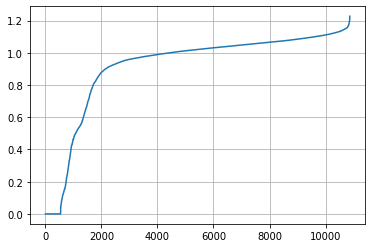

In [ ]:
import matplotlib.pyplot as plt

mean_dist = get_distance_for_core_obj(emb_tr[::10], 2)
plt.plot(np.sort(mean_dist))
plt.grid()
plt.show()

DBSCAN все также не сходится, поэтому попробую уменьшить количество наблюдений на которых мы обучаемся.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2, eps=0.6, n_jobs=-1)
dbscan.fit(np.concatenate([emb_tr[::10], emb_val]))

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=-1, p=None)

In [ ]:
labels_true = data_val['category'].tolist()
labels_pred = dbscan.labels_[len(emb_tr[::10]):]

print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels_pred):.5f}.')
print(f'V-measure: {metrics.v_measure_score(labels_true, labels_pred):.5f}.')
print(f'Fowlkes-Mallows scores: {metrics.fowlkes_mallows_score(labels_true, labels_pred):.5f}.')

Adjusted Rand index: 0.00175.
V-measure: 0.23005.
Fowlkes-Mallows scores: 0.20989.


***TF-IDF***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5, max_df=0.9)
tfidf.fit([" ".join(sent) for sent in text_tr])

train_tfidf = tfidf.transform([" ".join(sent) for sent in text_tr])
val_tfidf = tfidf.transform([" ".join(sent) for sent in text_val])

In [ ]:
train_tfidf.shape, val_tfidf.shape

((108651, 60739), (12073, 60739))

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

# pca = PCA(n_components=0.9)
svd = TruncatedSVD(n_components=100)
svd.fit(train_tfidf)

train_tfidf_pca = svd.transform(train_tfidf)
val_tfidf_pca = svd.transform(val_tfidf)

KMeans

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(train_tfidf_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=27, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
labels_true = data_val['category'].tolist()
labels_pred = kmeans.predict(val_tfidf_pca)

print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels_pred):.5f}.')
print(f'V-measure: {metrics.v_measure_score(labels_true, labels_pred):.5f}.')
print(f'Fowlkes-Mallows scores: {metrics.fowlkes_mallows_score(labels_true, labels_pred):.5f}.')

Adjusted Rand index: 0.15656.
V-measure: 0.35073.
Fowlkes-Mallows scores: 0.22400.


**DBSCAN**

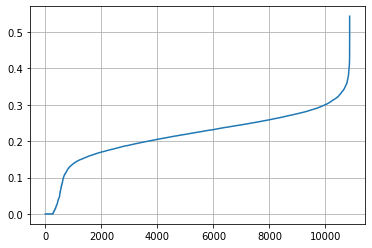

In [ ]:
mean_dist = get_distance_for_core_obj(train_tfidf_pca[::10], 5)
plt.plot(np.sort(mean_dist))
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(min_samples=5, eps=0.25, n_jobs=-1)
dbscan.fit(np.concatenate([train_tfidf_pca[::10], val_tfidf_pca]))

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [ ]:
labels_pred = dbscan.labels_[len(train_tfidf_pca[::10]):]

print(f'Adjusted Rand index: {metrics.adjusted_rand_score(labels_true, labels_pred):.5f}.')
print(f'V-measure: {metrics.v_measure_score(labels_true, labels_pred):.5f}.')
print(f'Fowlkes-Mallows scores: {metrics.fowlkes_mallows_score(labels_true, labels_pred):.5f}.')

Adjusted Rand index: 0.00345.
V-measure: 0.11512.
Fowlkes-Mallows scores: 0.19558.


**Подведем итог:**
По всем метрикам лучше всего отработала связка TFIDF[не использовали слова, которые встречается меньше чем в 5 и больше чем в 95% документах] + TruncatedSVD + KMEANS[n_clusters = 27]. 

https://www.datacamp.com/community/tutorials/wordcloud-python

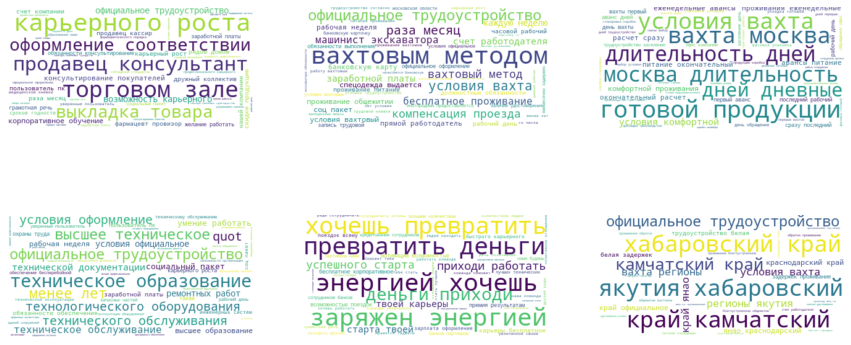

In [ ]:
from wordcloud import WordCloud

fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharey=True)

stopwords = ['график', 'опыт', 'тк', 'рф', 'работа', 'работы', 
             'требования', 'опыт', 'заработная', 'плата']
i = 0
labels = kmeans.labels_
for label in range(0, n_clusters, 5):
  mask = labels == label
  texts = np.array(text_tr)[mask]
  text = " ".join([" ".join(sent) for sent in texts])

  wordcloud = WordCloud(max_font_size=50, max_words=50, stopwords=stopwords,
                        background_color="white").generate(text)

  axes[i//3, i%3].imshow(wordcloud, interpolation="bilinear")
  axes[i//3, i%3].axis('off')

  i += 1

Что-то расклассифицировалось. Сейчас попробуем посмотреть кластеры только по названиям профессий.

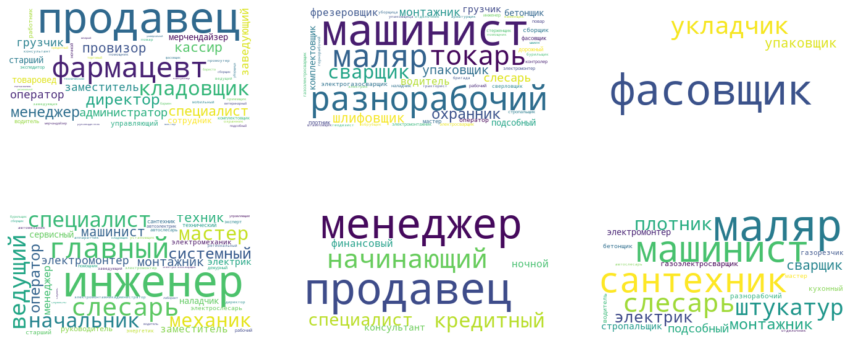

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharey=True)

i = 0
labels = kmeans.labels_
for label in range(0, n_clusters, 5):
  mask = labels == label
  texts = np.array(text_tr)[mask]
  text = " ".join([sent[0] for sent in texts])

  wordcloud = WordCloud(max_font_size=70, max_words=50,
                        background_color="white").generate(text)

  axes[i//3, i%3].imshow(wordcloud, interpolation="bilinear")
  axes[i//3, i%3].axis('off')

  i += 1

Начинающий ночной специалист звучит хорошо :)))

## Частичное обучение

![](https://i.imgur.com/C6HjiXq.png)

Качество unsupervised методов можно существенно улучшить, зная правильные ответы хотя бы для небольшой части выборки. Методы такого рода называются _частичным обучением (semi-supervised learning)_. Более подробно про реализацию таких методов в sklearn можно прочитать в разделе [semi-supervised](http://scikit-learn.org/stable/modules/label_propagation.html#semi-supervised).

**Задание 6. (1.5 балла)** 

- Разделите объекты, у которых существуют метки, на обучающую и тестовую выборки (при этом не обязательно делить в соотношении 70% на 30%). Обогатите обучающую выборку объектами без меток.
- Воспользовавшись опытом выполнения задания 6, возьмите "лучшее" векторное представление вакансий и обучите [LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html) (подберите лучшие параметры, опираясь на [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)).
- Попробуйте запустить алгоритм несколько раз, отмечая известными различные объекты, а также меняя пропорции разбиения, посчитайте качество и визуализируйте результаты. Можно ли сказать что алгоритм сильно зависит от известных начальных объектов? Есть ли класс, для которого это больше всего заметно?

In [ ]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import train_test_split

Наибольшее отношение при разбиении - 50/50. Следовательно это будет 12073 * 0.5 ~ 6к. Значит выберем из непромаркерованных примерно 2.5к объектов, 2.5/109 = 0.02 от всех непромаркерованных. Для всех экспериментов данные без меток будут одинковыми.

In [ ]:
from sklearn.model_selection import train_test_split

labels_true = data_val['category'].tolist()

for random_state, test_size in zip(range(0, 110, 12), np.linspace(0.1, 0.5, 10)):
  print(f'Random state={random_state} - Test size={test_size:.2f} -', end=" ")
  X_tr, X_test, labels_tr, labels_test = train_test_split(text_val, labels_true, 
                                                          test_size=test_size, 
                                                          random_state=random_state)
  
  print(f'Known clusters={len(set(labels_tr))} -', end=" ")
  
  unmarked = text_tr[::45]
  un_labels = np.array([-1] * len(unmarked))

  X_tr = np.concatenate([X_tr, unmarked], axis=0)
  labels_tr = np.concatenate([labels_tr, un_labels])

  tfidf = TfidfVectorizer(min_df=5, max_df=0.9)
  tfidf.fit([" ".join(sent) for sent in X_tr])

  train_tfidf = tfidf.transform([" ".join(sent) for sent in X_tr])
  test_tfidf = tfidf.transform([" ".join(sent) for sent in X_test])

  svd = TruncatedSVD(n_components=100)
  svd.fit(train_tfidf)

  train_tfidf_pca = svd.transform(train_tfidf)
  test_tfidf_pca = svd.transform(test_tfidf)

  label_prop_model = LabelSpreading(kernel='knn', n_neighbors=5, n_jobs=-1)
  label_prop_model.fit(train_tfidf_pca, labels_tr)

  labels_pred = label_prop_model.predict(test_tfidf_pca)

  score = metrics.f1_score(labels_test, labels_pred, average='weighted')

  print(f'F1 score={score:.4f}')

Random state=0 - Test size=0.10 - Known clusters=27 - F1 score=0.6807
Random state=12 - Test size=0.14 - Known clusters=27 - F1 score=0.7169
Random state=24 - Test size=0.19 - Known clusters=27 - F1 score=0.6863
Random state=36 - Test size=0.23 - Known clusters=27 - F1 score=0.6971
Random state=48 - Test size=0.28 - Known clusters=27 - F1 score=0.7070
Random state=60 - Test size=0.32 - Known clusters=27 - F1 score=0.6952
Random state=72 - Test size=0.37 - Known clusters=27 - F1 score=0.6811
Random state=84 - Test size=0.41 - Known clusters=27 - F1 score=0.6836
Random state=96 - Test size=0.46 - Known clusters=27 - F1 score=0.6811
Random state=108 - Test size=0.50 - Known clusters=27 - F1 score=0.6808


Видим, что в принципе значения метрики у нас лежать в диапазоне 0.69 +/- 0.02. Зависимости от того, в какой пропорции мы брали объекты с известными и неизвестными маркерами не видно. Среди известных маркеров у нас присутствовали все метки.

**Замечание**: Выполнив задание 6, обучите лучшую модель на всех данных из *vacancies_train.csv*, сделайте предсказание для *vacancies_test.csv* и участвуйте в [конкурсе](https://www.kaggle.com/t/e786707065df4a79b6c935eac2edc80f)!

### Конкурс

In [ ]:
test = pd.read_csv('vacancies_test.csv')
data_test = pd.DataFrame(test)
data_test['name'] = data_test['name'].apply(preprocess_text)
data_test['description'] = data_test['description'].apply(preprocess_text)

In [ ]:
print(data_train.shape, data_val.shape, data_test.shape)

In [ ]:
text_test = data_test['name'] + ' ' + data_test['description']
pd.DataFrame(text_test).to_csv('test.csv')
text_test = [sent.split() for sent in text_test]

In [ ]:
print(len(text_tr), len(text_val), len(text_test))

108651 12073 59462


In [ ]:
tfidf = TfidfVectorizer(min_df=5, max_df=0.9)
tfidf.fit([" ".join(sent) for sent in text_tr + text_val])

train_tfidf = tfidf.transform([" ".join(sent) for sent in text_tr])
val_tfidf = tfidf.transform([" ".join(sent) for sent in text_val])
test_tfidf = tfidf.transform([" ".join(sent) for sent in text_test])

In [ ]:
print(train_tfidf.shape, val_tfidf.shape, test_tfidf.shape)

(108651, 63913) (12073, 63913) (59462, 63913)


In [ ]:
from scipy.sparse import vstack

In [ ]:
svd = TruncatedSVD(n_components=100)
svd.fit(vstack([train_tfidf, val_tfidf]))

train_tfidf_pca = svd.transform(train_tfidf)
val_tfidf_pca = svd.transform(val_tfidf)
test_tfidf_pca = svd.transform(test_tfidf)

In [ ]:
print(train_tfidf_pca.shape, val_tfidf_pca.shape, test_tfidf_pca.shape)

(108651, 100) (12073, 100) (59462, 100)


In [ ]:
labels_true = data_val['category'].tolist()
len(labels_true)

12073

In [ ]:
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=5, n_jobs=-1)
label_prop_model.fit(val_tfidf_pca, labels_true)

labels_pred = label_prop_model.predict(train_tfidf_pca)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='saga')
model.fit(np.concatenate([train_tfidf_pca, val_tfidf_pca], axis=0), np.concatenate([labels_pred, labels_true]))
labels_test = model.predict(test_tfidf_pca)

In [ ]:
submit = pd.DataFrame(labels_test, columns=['category'])
submit.to_csv('submit.csv')

## Тематическое моделирование

![](http://imgur.com/S8WgwBp.png)

Тематическое моделирование является популярным инструментом анализа текстов. Задача заключается в поиске тем $T$, которые хорошо бы описывали документы $D$ со словарём $W$. Большинство тематических моделей оперирует данными в формате "мешка слов", т.е. учитывают только частоты слов в документах, а не их порядок. Одной из простейших тематических моделей является [PLSA](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis), которая приводит к задаче стохастического матричного разложения: 

$$F \approx \Phi \times \Theta$$
где
- $F_{W \times D}$— матрица распределений слов в документах (нормированные частоты)
- $\Phi_{W \times T}$ — матрица распределений слов в темах (модель)
- $\Theta_{T \times D}$ — матрица распределений тем в документах (результат применения модели к обучающим данным)

Можно сказать, что алгоритмы тематического моделирования производят мягкую бикластеризацию данных:
 - *мягкую*, так как объекты относятся не строго к одному кластеру, а к нескольким с разными вероятностями
 - *бикластеризацию*, так как модель одновременно кластеризует слова по темам и темы по документам.

### EM-алгоритм

![](http://imgur.com/EeIuI1T.png)

С вероятностной точки зрения, задача обучения модели PLSA ставится как максимизация неполного правдоподобия по параметам $\Phi$ и $\Theta$. ЕМ-алгоритм для модели PLSA заключается в повторении двух шагов:

- **Е-шаг** — оценка распределений тем для каждого слова в каждом документе по параметрам $\Phi$ и $\Theta$ (шаг 6);
- **М-шаг** — обновление параметров $\Phi$ и $\Theta$ на основе полученных оценок (шаги 7 и 9).

Существуют различные модификации итерационного процесса, позволяющие снизить расходы по памяти. В данном случае, мы избежим хранения трехмерной матрицы $p_{tdw}$, сразу пересчитывая $\Theta$ для текущего документа и аккумулируя счетчики $n_{wt}$ для последующего пересчета $\Phi$.

Псевдокод алгоритма записывается следующим образом:

1. Инициализировать $\phi_{wt}^0$ для всех $w \in W$, $t \in T$ и $\theta_{td}^0$ для всех $t \in T$, $d \in D$
2. Внешний цикл по итерациям $i = 1 ... max\_iter$:
3. $\quad$ $n_{wt}^i := 0$, $n_t^i := 0$ для всех $w \in W$ и $t \in T$ 
4. $\quad$ Внутренний цикл по документам $d \in D$  
5. $\qquad$ $Z_w := \sum_{t \in T} \phi_{wt}^{i-1}\theta_{td}^{i-1}$ для всех $w \in d$ $\cfrac{}{}$
6. $\qquad$ $p_{tdw} := \cfrac{ \phi_{wt}^{i-1}\theta_{td}^{i-1} }{ Z_w }$ (**E-шаг**)
7. $\qquad$ $\theta_{td}^{i} := \cfrac{ \sum_{w \in d} n_{dw} p_{tdw} }{ n_d }$ для всех $t \in T$ (**M-шаг**)
8. $\qquad$ Увеличить $n_{wt}^i$ и $n_t^i$ на $n_{dw} p_{tdw}$ для всех $w \in W$ и $t \in T$
9. $\quad \phi_{wt}^i := \cfrac{n_{wt}^i}{n_t^i}$ для всех $w \in W$ и $t \in T$ (**M-шаг**)

Обозначения:
 - $p_{tdw}$ — вероятность темы $t$ для слова $w$ в документе $d$
 - $\phi_{wt}$ — элемент матрицы $\Phi$, соответствующий вероятности слова $w$ в теме $t$
 - $\theta_{td}$ — элемент матрицы $\Theta$, соответствующий вероятности темы $t$ в документе $d$
 - $n_{wt}$ — элемент матрицы счётчиков отнесения слова $w$ к теме $t$ (путем нормирования этой матрицы получается матрица $\Phi$)
 - $Z_w$ — элемент вектора вспомогательных переменных, соответствующий слову $w$
 - $n_t$ — вектор нормировочных констант для матрицы $n_{wt}$
 - $n_d$ — вектор нормировочных констант для матрицы $n_{dw}$
 - $n$ — суммарное число слов в коллекции
 
###  Оценка качества

Для оценивания качества построенной модели и контроля сходимости процесса обучения обычно используют [перплексию](http://www.machinelearning.ru/wiki/images/8/88/Voron-iip9-talk.pdf):

$$\mathcal{P} = \exp\bigg(- \frac{\mathcal{L}}{n} \bigg) = \exp\bigg(- \cfrac{1}{n}\sum_{d \in D}\sum_{w \in d} n_{dw} \ln \big(\sum_{t \in T}\phi_{wt}\theta_{td} \big)\bigg)$$

Это традиционная мера качества в тематическом моделировании, которая основана на правдоподобии модели $\mathcal{L}$. Число итераций $max\_iter$ в алгоритме обучения следует выбирать достаточным для того, чтобы перплексия перестала существенно убывать. Однако известно, что перплексия плохо отражает интерпретируемость найденных тем, поэтому помимо нее обычно используются дополнительные меры или экспертные оценки.

### Рекомендации к реализации
- При делении на нулевые значения нужно просто заменить частное на ноль.
- ЕМ-алгоритм стоит реализовывать с использованием векторных операций. Для проверки корректности реализации сперва можно написать скалярную версию, после чего векторизовать её, удостоверившись, что обе реализации дают одинаковый результат. Невекторизованный алгоритм может работать в сотни раз медленнее векторизованного, и его использование может привести к невозможности выполнения задания.
- Итерационный процесс следует начинать, инициализировав матрицы $\Phi$ и $\Theta$. Инициализация может быть случайной, важно не забыть отнормировать столбцы матриц.
- Неэффективная реализация перплексии может в разы замедлить работу алгоритма.

**Задание 7. (3 балла)** Реализуйте описанный выше ЕМ-алгоритм для модели $PLSA$ и добавьте в вашу реализацию подсчёт перплексии. Примените ваш алгоритм к подготовленным данным, рассмотрев число тем T = 5. 
* Постройте график значения перплексии в зависимости от итерации (убедитесь в корректности реализации: график перплексии должен быть невозрастающим). 
* Выведите для каждой темы топ-20 наиболее вероятных слов. 

In [ ]:
import pandas as pd
import numpy as np
import zipfile

In [ ]:
with zipfile.ZipFile('val.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
text_tr = pd.read_csv('train.csv')
text_tr = [sent.split() for sent in text_tr['0']]

In [ ]:
text_val = pd.read_csv('val.csv')
text_val = [sent.split() for sent in text_val['0']]

In [ ]:
text_test = pd.read_csv('test.csv')
text_test = [sent.split() for sent in text_test['0']]

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def perplexity(topic_doc, term_topic, doc_term, wor2id, id2word):
  n_terms, ntopics = term_topic.shape
  n_docs = topic_doc.shape[1]

  sum_docs = 0
  for doc_id in range(len(doc_term)):
    ids = list(set([word2id[word] for word in doc_term[doc_id].keys()]))
    
    Z = term_topic[ids, :] @ topic_doc[:, doc_id]
    Z[Z != 0] = np.log(Z[Z!=0])
    Z[Z == 0] = 0

    count_per_doc = np.array([doc_term[doc_id][id2word[id]] for id in ids])
    
    doc = np.sum(count_per_doc * Z)

    sum_docs += doc
  
  return np.exp(-sum_docs/n_terms)

In [ ]:
def count_words_per_docs(text):
  dw_counts = []

  word2id = dict()
  id2word = dict()

  word_id = 0
  for doc in tqdm(text):
    counter = Counter()
    counter.update(doc)

    for word in doc:
      if word not in word2id.keys():
        word2id[word] = word_id
        id2word[word_id] = word
        word_id += 1
    dw_counts.append(counter)

  return dw_counts, word2id, id2word

In [ ]:
def plsa(doc_term, wor2id, id2word, n_topics, n_iter, random_state=0):
  n_docs = len(doc_term)
  n_terms = len(word2id)

  np.random.seed(random_state)

  term_topic = np.random.uniform(size=(n_terms, n_topics))
  term_topic /= np.sum(term_topic, axis=0).reshape(1, -1)

  topic_doc = np.random.uniform(size=(n_topics, n_docs))
  topic_doc /= np.sum(topic_doc, axis=0).reshape(1, -1)

  perplexities = []
  for i in range(n_iter):
    # print (f"Running iteration {i} -", end = " ")

    term_topic_count = np.zeros((n_terms, n_topics))

    # for doc_id in tqdm(range(len(doc_term))):
    for doc_id in range(len(doc_term)):
      ids = list(set([word2id[word] for word in doc_term[doc_id].keys()]))
      Z = (term_topic[ids, :] @ topic_doc[:, doc_id])
      Z = np.tile(Z, (n_topics, 1)).T

      probs = term_topic[ids, :] * np.tile(topic_doc[:, doc_id], (len(ids), 1))
      probs /= Z
      probs[Z == 0] = 0

      count_per_doc = np.array([doc_term[doc_id][id2word[id]] for id in ids]).reshape(-1, 1)

      topic_doc[:, doc_id] = (probs.T @ count_per_doc).squeeze()

      delta = np.tile(count_per_doc[:, 0], (n_topics, 1)).T * probs
      term_topic_count[ids, :] += delta

      norm = np.tile(np.sum(term_topic_count, axis=0), (len(term_topic), 1))
      term_topic = term_topic_count / norm
      term_topic[norm == 0] = 0

    norm = np.tile(np.sum(topic_doc, axis=0), (len(topic_doc), 1))
    topic_doc /= norm
    topic_doc[norm == 0] = 0

    perpl = perplexity(topic_doc, term_topic, doc_term, wor2id, id2word)
    perplexities.append(perpl)
    # print(f'Perplexity = {perpl:.2f}')

  return topic_doc, term_topic, perplexities

In [ ]:
dw_counts, word2id, id2word = count_words_per_docs(text_val)

Обучала модель только на валидационной выбрке (это та, которая помечена).

In [ ]:
topic_doc, term_topic, perplexities = plsa(dw_counts, word2id, id2word, 5, 21)

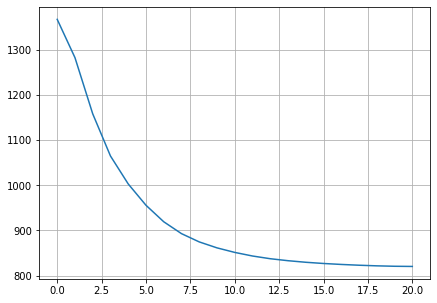

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(perplexities)
plt.grid()
plt.show()

In [ ]:
for i in range(5):
  print(f'Topic {i}: {[id2word[idx] for idx in np.argsort(term_topic[:, i])[-20:]]}')

Topic 0: ['изготовления', 'быстрая', 'образование', 'исследования', 'обязанности', 'высшее', 'работы', 'требования', 'инициативность', 'ответственность', 'обучаемость', 'изделий', 'технического', 'взаимодействие', 'материалов', 'производства', 'качества', 'опыт', 'разработка', 'знание']
Topic 1: ['1', 'образование', 'итогам', 'строгое', 'премия', 'стандартов', 'калужская', 'результатам', 'опыт', 'года', 'знание', 'ответственность', 'требования', 'обязанности', 'условия', 'соблюдение', 'м', 'тк', 'рф', 'работы']
Topic 2: ['10', 'создание', 'лет', 'образование', '1', '3', 'менее', 'участие', 'года', 'моделей', 'посещение', 'тк', 'рф', 'ответственность', 'знание', 'обязанности', 'требования', 'условия', 'опыт', 'работы']
Topic 3: ['деталей', 'посещение', 'лет', 'категории', 'проектирования', 'создание', 'итогам', 'знание', 'анализа', 'стандартов', 'премия', 'технических', 'техники', 'сопровождение', 'инженер', 'результатам', 'проектов', 'подготовка', 'участие', '3']
Topic 4: ['опыт', 'лаг

Пока не получается тут увидеть какие-то осознанные темы.

**Задание 8. (1 балл)** Рассмотрите большее число тем (10, 20) и несколько различных начальных приближений. Проанализируйте результаты и ответьте на следующие вопросы: 
- Mожно ли сказать, что конкретность каждой темы изменяется с ростом их числа?
- Устойчив ли алгоритм к начальному приближению на примере идентичности топовых слов в соответствующих темах?
- Отражает ли перплексия качество получаемых моделей? В чём заключается причина хорошего/плохого соответствия?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


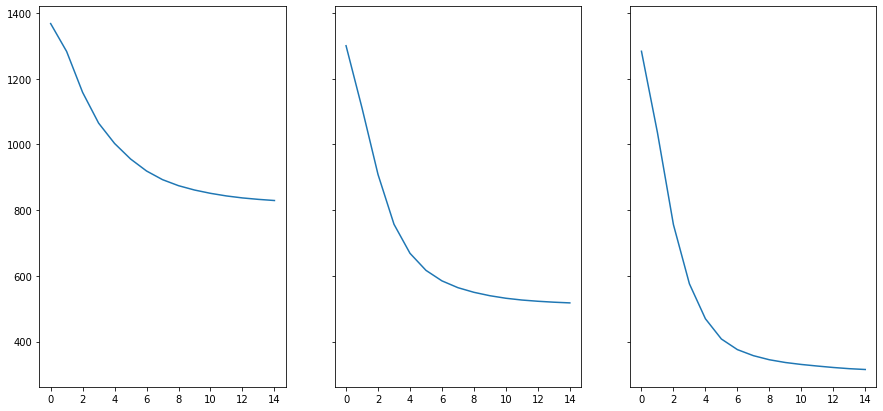

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

n_iter = 15

i = 0
for n_topics in [5, 10, 20]:
  _, _, perplexities = plsa(dw_counts, word2id, id2word, n_topics, n_iter)
  axes[i].plot(perplexities)
  i += 1

Выведем более вероятные слова для тем, если их 20.

In [ ]:
for i in range(0, 20, 2):
  print(f'Topic {i}: {[id2word[idx] for idx in np.argsort(term_topic[:, i])[-20:]]}')

Topic 0: ['менеджмент', 'отработка', 'специальность', 'года', 'образование', 'знание', 'тк', 'высшее', 'менее', 'основы', 'рф', 'требования', 'условия', 'обязанности', 'опыт', 'работы', 'итогам', 'материалов', 'качества', 'участие']
Topic 2: ['материалов', 'менее', 'тк', 'проектов', 'высшее', 'взаимодействие', 'электротехники', 'рф', 'образование', 'производства', 'года', 'создание', 'анализа', 'моделей', 'условия', 'обязанности', 'работы', 'требования', 'опыт', 'знание']
Topic 4: ['инициативность', 'высшее', 'конструкций', 'основы', 'санчасть', 'качества', 'менее', 'образование', 'года', 'производства', 'знание', 'специальность', 'ответственность', 'тк', 'рф', 'опыт', 'работы', 'требования', 'обязанности', 'условия']
Topic 6: ['санчасть', 'тк', 'рф', 'деятельность', 'минут', 'стандартов', 'опыт', 'пешком', 'условия', 'электротехники', 'работы', 'требования', 'основы', 'строгое', 'обязанности', 'деталей', 'техники', 'соблюдение', 'результатам', 'м']
Topic 8: ['описаний', 'работы', 'тре

1) По идее темы должны становиться более узко направленными. Но у нас все связано с профессиями и поэтому темы пересекаются, так как используются общие шаблоны в требованиях.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


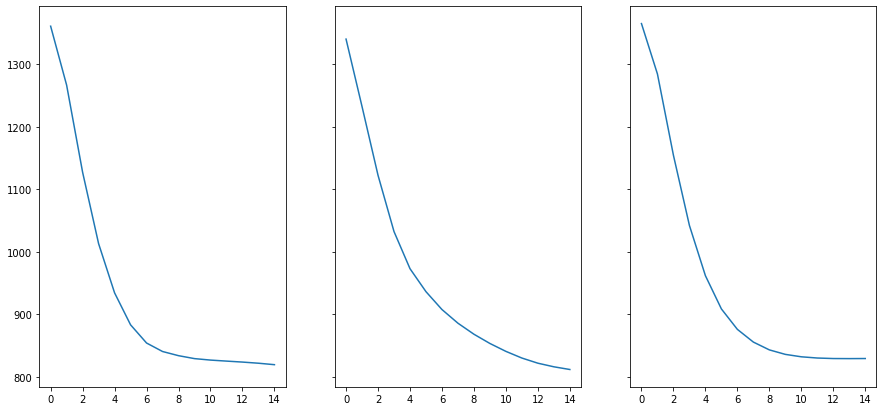

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

n_topics = 5
n_iter = 15

i = 0
for random_state in [5, 10, 42]:
  _, _, perplexities = plsa(dw_counts, word2id, id2word, n_topics, 
                            n_iter, random_state=random_state)
  axes[i].plot(perplexities)
  i += 1

2) Алгоритм зависит от начальных значений. В принципе, все три запуска дали соизмеримые результаты. Но на второй картинке результат мог быть поменьше при большем количестве итераций.

3) Так как преплексия - это экспонента от среднего функции правдоподобия, то она показывает насколько хорошо подобрано распределение слов по темам.

### Модель LDA и визуализация

Модель [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) является наиболее популярной тематической моделью. Единственное отличие от модели PLSA заключается в введении априорных распределений Дирихле на столбцы матриц $\Phi$ и $\Theta$, которое может способствовать дополнительному сглаживанию или разреживанию параметров.

В этом задании предлагается воспользоваться реализацией модели [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html), обучение которой основано на вариационном байесовском выводе.

Выполнение задания потребует установки пакетов [gensim](https://radimrehurek.com/gensim/install.html) и [pyldavis 2.0](https://pyldavis.readthedocs.io/en/latest/readme.html#installation).


Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim, который можно получить следующей командой

    dictionary = gensim.corpora.Dictionary.from_corpus(corpora, vocab_dict)

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы CountVectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Подготовьте данные в формате, подходящем для *gensim* (полное [API](https://radimrehurek.com/gensim/apiref.html) gensim). [Пример обработки вывода](https://gist.github.com/aronwc/8248457) *CountVectorizer* для gensim.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(min_df=10)
X = vec.fit_transform([" ".join(text) for text in text_val])
vocab = vec.get_feature_names()

**Задание 9. (1.5 балла)** Примените [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) к подготовленным данным (рекомендуется задать заведомо большое число итераций в параметре *passes*, например, 30). Визуально сравните полученные темы по топ-20 наиболее вероятным словам с темами, полученными вашей реализацией ЕМ-алгоритма (нерегуляризованного). Какая из моделей даёт более интерпретируемые темы и почему?

In [ ]:
from gensim.models import LdaModel
from gensim import matutils

id2word = dict([(idx, word) for idx, word in enumerate(vocab)])
corpus = matutils.Sparse2Corpus(X, documents_columns=False)
lda = LdaModel(corpus, id2word=id2word, num_topics=20, passes=30)

In [ ]:
lda.show_topics()

[(15,
  '0.031*"компании" + 0.016*"quot" + 0.016*"работы" + 0.013*"компания" + 0.013*"роста" + 0.011*"карьерного" + 0.011*"сотрудников" + 0.010*"персонала" + 0.010*"профессионального" + 0.010*"возможность"'),
 (11,
  '0.030*"оборудования" + 0.019*"работ" + 0.013*"производства" + 0.012*"безопасности" + 0.011*"знание" + 0.011*"контроль" + 0.011*"труда" + 0.010*"техническое" + 0.010*"работы" + 0.009*"образование"'),
 (17,
  '0.024*"работы" + 0.012*"товара" + 0.011*"компании" + 0.011*"обязанности" + 0.010*"quot" + 0.009*"оформление" + 0.009*"образование" + 0.009*"наличие" + 0.009*"график" + 0.008*"работа"'),
 (19,
  '0.023*"счет" + 0.022*"работодателя" + 0.017*"работы" + 0.016*"обязанности" + 0.015*"работать" + 0.014*"судна" + 0.012*"проживание" + 0.011*"край" + 0.010*"контракт" + 0.010*"страховка"'),
 (13,
  '0.023*"работы" + 0.019*"контроль" + 0.016*"опыт" + 0.014*"организация" + 0.013*"знание" + 0.009*"высшее" + 0.009*"требования" + 0.008*"образование" + 0.008*"1с" + 0.008*"деятельности

Тут темы тоже вышли не самые интерпретируемые. Возможно, как я писала ранее, это связано с тем, что у нас весь корпус предложений на тему работы(ключевые слова - работа, знания, зп, оплата, требования). Поэтому он хорошо находит эту тему, а вот подтемы профессий сложнее определяет.

Если смотерть глазками, то модели дали аналогичные результаты. Хотя LDA вроде как должен отрабатывать лучше.

**Задание 10. (1.5 балла)** Визуализируйте модель из gensim с помощью библиотеки *ldavis* ([API](http://pyldavis.readthedocs.io/en/latest/modules/API.html) LDAvis для работы с gensim), [пример использования](https://github.com/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb).

In [ ]:
!pip3 install pyldavis

In [ ]:
import pyLDAvis.gensim
import gensim
from collections import Counter

dictionary = gensim.corpora.Dictionary.from_corpus(corpus, id2word)
to_visualize = pyLDAvis.gensim.prepare(lda, corpus, dictionary)

In [ ]:
pyLDAvis.display(to_visualize)

Ого! Крутая визуализация! Интерактивная.
На ней уже можно выделить и тему про учет какую-то, и про юридические акты и тему про цифры, дни и года.

Крутая тема "трудовой коллектив" - слова: наша, команда, вместе, людей, развиваться, будем рады :) Оч позитивно!

## Графовые представления

![Графовые представления](https://i.imgur.com/dwGJDxo.png)

В рамках данного раздела мы будем строить векторные представления для вершин и ребер графа знаний.
Графы знаний (Knowledge Graphs) представляют собой графы, вершинами которых являются сущности, а ребрами - типизированные отношения между сущностями. Примерами таких графов могут данные социальных сетей. Вершинами могут быть пользователи, группы, публикации, а отношениями, например, следующие: 
  - "пользователь A дружит с пользователем B", 
  - "пользователь A состоит в группе X",
  - "пользователю А понравилась публикация Y",
  - "публикация Y создана в группе Z".

С помощью таких графов сейчас решается широкий спектр задач: классификация вершин, восстановление связей, построение рекомендаций, кластеризация графа, поиск сообществ и другие.

Формально, граф знаний $G = \{(sub, pred, obj)\} \in \mathcal{E} \times \mathcal{R} \times \mathcal{E}$ представляет собой набор троек $(sub, pred, obj)$, в которых $sub \in \mathcal{R}, obj \in \mathcal{R}$ - сущности, а $pred \in \mathcal{E}$ - отношение.

Для решения задач на графах знаний обычно строятся модели представлений (graph embeddings models). Для вершин и ребер графа вычисляются вектора в пространстве небольшой размерности. Это преобразование обладает таким свойством, что "близкие" в некотором смысле вершины в графе соответствуют близкие вектора представлений.

В этой работе мы рекомендуем воспользоваться библиотекой [AmpliGraph](https://docs.ampligraph.org/en/1.3.2/) для обучения моделей.
Эксперименты будем проводить на датасете с вакансиями (*vacancies_train.csv*). Нашей задачей будет восстановить категорию вакансии (*category*), то есть для вершины "вакансия X" и вершины "категория Y" определить, есть ли ребро между ними в графе знаний.

**Задание 11. (1 балл)** Построение обучающей и валидационной выборок.

Для построения графа необходимо подготовить набор троек $(sub, pred, obj)$ по имеющимся данным. В роли $sub$ и $obj$ могут быть сами вакансии (*id*), названия вакансий (*name*), тип расписания (*schedule_id*), ожидаемый опыт (*experience_id*) и т.д.. Обязательным типом сущностей является категория вакансии (*category*).

Таким образом, одна запись из датасета:


| id   | name                   |  schedule_id  | experience_id | category |
|------|------------------------|---------------|---------------|----------|
| 1111 | Супервайзер по бурению | shift         | between3And6  | 1.0      |

Может представляться несколькими тройками:

| sub  | pred             | obj                    |
|------|------------------|------------------------|
| 1111 | has_name         | Супервайзер по бурению |
| 1111 | has_schedule     | shift                  |
| 1111 | has_experience   | between3And6           |
| 1111 | has_vacancy_type | 1.0                    |

В обучающей выборке должны быть частично скрыты категории. Удалите случайные 20% ребер между вакансией и типом категории. Помните, что эксперимент должен быть воспроизводимым, поэтому везде фиксируйте random seed. Эти удаленные связи мы постараемся восстановить, а качество предсказания этих связей проверить на валидационном наборе данных. Таким образом, часть связей, удаленная из обучающего множества, образует собой множество для валидации.

Все остальные связи присутствуют и в обучающем графе, и в валидационном. Другими словами, мы предполагаем, что вся информация о вакансиях, кроме факта принадлежности вакансии категории, нам известна.

В валидационной выборке оставьте только тройки *(id, has_vacancy_type, category)*, скрытые при обучении.

Обратите внимание, что разные сущности не должны иметь одинаковые имена (то есть, например, id вакансий не должны пересекаться с id категории вакансии)

В рамках данного раздела не используйте текстовую информацию из поля *description*: не нужно строить отношения **"вакансия Х содержит в описании слово Y"**. Если ранее мы строили векторные представления, основываясь на текстах, то теперь попробуем построить их по различным связям между сущностями в графе.

In [ ]:
!pip3 install folium==0.2.1 ampligraph

In [2]:
import ampligraph
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('vacancies_train.csv')

In [ ]:
train.head()

,id,name,description,key_skills,schedule_id,employment_id,experience_id,accept_handicapped,accept_kids,salary_from,salary_to,salary_gross,salary_currency,area_id,employer_id,type_id,created_at,published_at,category
0,0,Электромонтер,<strong>Обязанности:</strong> <ul> <li>Устране...,NaN,fullDay,full,between1And3,False,False,22000.0,NaN,True,RUR,92,2748.0,open,2019-09-05T12:44:54+0300,2019-09-05T12:44:54+0300,NaN
1,1,Менеджер продукта,<p><strong>Компания ООО «ТД ТОРЭКС» - крупная ...,MS Excel\tMS Word\tMS PowerPoint\tУправление п...,fullDay,full,between1And3,False,False,NaN,NaN,NaN,NaN,79,665484.0,open,2019-09-06T07:21:11+0300,2019-09-06T07:21:11+0300,NaN
2,2,Водитель категории Е,<p><em><strong>ООО &quot;ТЭМПО-Логистик&quot; ...,NaN,flexible,full,between1And3,False,False,NaN,90000.0,True,RUR,1643,2881026.0,open,2019-09-09T11:49:50+0300,2019-09-09T11:49:50+0300,NaN
3,3,Директор по продажам,<p><strong>Требования:</strong></p> <ul> <li>В...,Планирование продаж\tПоиск и привлечение клиен...,fullDay,full,between3And6,False,False,120000.0,180000.0,True,RUR,1,1930011.0,open,2019-09-06T17:56:09+0300,2019-09-06T17:56:09+0300,NaN
4,4,Участковый маркшейдер,<p><strong>Обязанности:</strong></p> <ul> <li>...,NaN,flyInFlyOut,full,between1And3,False,False,NaN,NaN,NaN,NaN,54,2325231.0,open,2019-09-02T09:33:28+0300,2019-09-02T09:33:28+0300,NaN


In [ ]:
# has name
name = train[['id', 'name']]
name = name[~name.isna().any(axis=1)]
name['pred'] = 'has_name'
name['id'] = name['id'] + 1110
name.rename(columns={'id': 'sub', 'name': 'obj'}, inplace=True)

# has schedule
schedule = train[['id', 'schedule_id']]
schedule = schedule[~schedule.isna().any(axis=1)]
schedule['pred'] = 'has_schedule'
schedule['id'] = schedule['id'] + 1110
schedule.rename(columns={'id': 'sub', 'schedule_id': 'obj'}, inplace=True)

# has experience
experience = train[['id', 'experience_id']]
experience = experience[~experience.isna().any(axis=1)]
experience['pred'] = 'has_experience'
experience['id'] = experience['id'] + 1110
experience.rename(columns={'id': 'sub', 'experience_id': 'obj'}, inplace=True)

In [ ]:
# has vacancy_type
vacancy_type = train[['id', 'category']]
vacancy_type = vacancy_type[~vacancy_type['category'].isna()]
vacancy_type['pred'] = 'has_vacancy_type'
vacancy_type['category'] = vacancy_type['category'].astype(int).astype(str)
vacancy_type['id'] = vacancy_type['id'] + 1110
vacancy_type.rename(columns={'id': 'sub', 'category': 'obj'}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

vacancy_type, data_val = train_test_split(vacancy_type, test_size=0.2)
data_val = data_val[['sub', 'pred', 'obj']]

In [ ]:
print(vacancy_type.shape, data_val.shape)

(9658, 3) (2415, 3)


In [ ]:
data_train = pd.concat([name, schedule, experience, vacancy_type])
data_train = data_train[['sub', 'pred', 'obj']]
data_train.reset_index(drop=True, inplace=True)
data_train['sub'] = data_train['sub'].astype(int).astype(str)
data_train['obj'] = data_train['obj'].astype(str)
data_train.tail()

,sub,pred,obj
371825,18249,has_vacancy_type,8
371826,64660,has_vacancy_type,22
371827,98358,has_vacancy_type,14
371828,78024,has_vacancy_type,14
371829,28119,has_vacancy_type,4


In [ ]:
data_val.reset_index(drop=True, inplace=True)
data_val['sub'] = data_val['sub'].astype(int).astype(str)
data_val['obj'] = data_val['obj'].astype(int).astype(str)
data_val.head()

,sub,pred,obj
0,95704,has_vacancy_type,14
1,41849,has_vacancy_type,12
2,113787,has_vacancy_type,13
3,39947,has_vacancy_type,13
4,39549,has_vacancy_type,24


**Задание 12. (1 балл)** Обучение модели.

Описание моделей приводится [здесь](https://docs.ampligraph.org/en/1.3.2/ampligraph.latent_features.html).
Обучите модель *ComplEx* на тренировочном графе. Качество модели проверяйте по метрике [hits3](https://docs.ampligraph.org/en/1.3.2/generated/ampligraph.evaluation.hits_at_n_score.html#ampligraph.evaluation.hits_at_n_score) на валидационных данных (используйте параметры *early_stopping* и *early_stopping_params*).

После обучения модели примените модель к валидационным данным самостоятельно с помощью функции [evaluate_perfomance](https://docs.ampligraph.org/en/1.3.2/generated/ampligraph.evaluation.evaluate_performance.html#ampligraph.evaluation.evaluate_performance). Эта функция генерирует множество негативных объектов для данной тройки $(id, has\_vacancy\_type, *)$ и считает ранк, на который попала истинная категория среди всех созданных негативных вариантов. Проверьте, что качество совпало с качеством в процессе обучения модели.






In [ ]:
!pip3 install tensorflow==1.15.2

In [1]:
from ampligraph.datasets import load_from_csv
from ampligraph.latent_features import ComplEx
from ampligraph.evaluation import evaluate_performance, hits_at_n_score

In [ ]:
data_train.to_csv('train_ampl.csv', index=False)
data_val.to_csv('val_ampl.csv', index=False)

In [3]:
data_train = load_from_csv('./', 'train_ampl.csv', ',')
data_val = load_from_csv('./', 'val_ampl.csv', ',')

In [7]:
random_state = 42

complEx = ComplEx(seed=random_state, verbose=True)
complEx.fit(data_train, 
            early_stopping = True,
            early_stopping_params = \
              {
                  'x_valid': data_val,   # validation set
                  'criteria':'hits3'    # corrupt subject and object (but not at once)
              })

Average Loss:   0.242730: 100%|██████████| 100/100 [1:18:54<00:00, 47.34s/epoch] 


In [ ]:
ranking = evaluate_performance(data_val, complEx, verbose=True)

In [ ]:
 hits_at_n_score(ranking, n=3)

0.0519453642384106

**Задание 13. (3 балл)** Настройка модели.

Теперь попробуем улучшить значение целевой метрики. В рамках этого задания можно пользоваться любыми моделями из представленных в [библиотеке](https://docs.ampligraph.org/en/1.3.2/ampligraph.latent_features.html).

Есть несколько способов для улучшения качества восстановления связей.
- Изменение структуры графа.
   1. Настройка множества используемых при обучении типов отношений. Поскольку валидируемся мы только на одном типе (has_vacancy_type), то другие типы могут "сбивать" модель, а некоторые, наоборот, улучшают предсказательную способность.
   2. Настройка количества используемых сущностей. Например, рассмотрим отношение *has_key_skill* (каждая вакансия может иметь несколько ребер до вершин способностей, а может не иметь, если в поле стоит NaN). Многие способности в датасете встречаются лишь однажды. Информация о таких способностях вряд ли будет полезной и вероятно только замедлит обучение. Или, например, если используется колонка salary_from, то логично разбить на несколько бакетов значения зарплат, а не использовать их все.
   3. Дополнительные связи между другими колонками. Например, между salary_from и salary_to. Не нужно строить дополнительные связи к целевой колонке *category*.
- Выбор модели. Можно пробовать различные модели, представленные в AmpliGraph. У них общий интерфейс и подменить одну модель другой - не сложно. Заранее неизвестно какая модель лучше подойдет для вашей задачи.
- Тюнинг параметров.
    1. Параметры представления: размерность представления, кол-во негативных примеров.
    2. Общие параметры: функция потерь, кол-во эпох обучения, параметры оптимизатора.
    2. Специфичных для модели параметров: например, размеры сверток для сверточных моделей.
    
Помочь в настройке параметров может реализованный в библиотеке [grid_search](https://docs.ampligraph.org/en/1.3.2/generated/ampligraph.evaluation.select_best_model_ranking.html).

Попробуйте различные способы и добейтесь хорошего качества на валидационной выборке. Необязательно делать все из представленного выше, но по отчету должно быть понятно, что вы в достаточной мере исследовали разные возможности.

**Задание 14. (0.5 балла)** Визуализация представлений.

Возьмите лучшую модель и с помощью метода *get_embeddings* получите представления для вакансий из валидационной выборки. 
С помощью tSNE визуализируйте вакансии. Цветом покажите категорию. После этого выделите те вакансии, для которых evaluate_perfomance предсказал низкие ранки (то есть те вакансии, категории для которых определились хорошо). Визуализируйте представления отдельно для таких вакансий.

In [ ]:
vacancies = data_val[:, 0][1:]
labels = data_val[:, 2][1:].astype(int)

embeddings = complEx.get_embeddings(entities=vacancies)
embeddings.shape

(2415, 200)

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000)
X_tsne = tsne.fit_transform(embeddings)

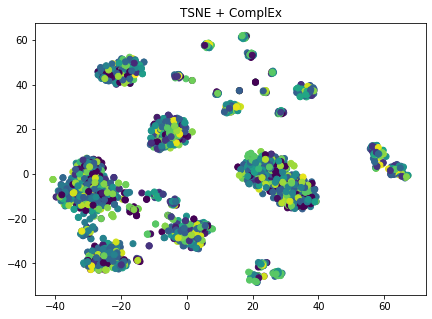

In [ ]:
plot_results(X_tsne, labels, 'TSNE + ComplEx')

Вакансии каких категорий оказались близки?

Как-то вышло, что у нас все категории перемешались по соседству эмбедингов. Так что даже и не скажешь, какие вакансии рядом. Может это потому, что я выбрала модель, с которой мы стартовали.

Визуализируйте те сущности, которые вы использовали в модели. Представления для каких из них оказались похожими?

In [ ]:
import numpy as np

In [18]:
names = data_train[data_train[:, 1] == 'has_name'][:, 2]
schedule = data_train[data_train[:, 1] == 'has_schedule'][:, 2]
experience = data_train[data_train[:, 1] == 'has_experience'][:, 2]
vacancies = data_train[data_train[:, 1] == 'has_vacancy_type'][:, 2]

labels = np.array([0]*len(names) + [1]*len(schedule) + [2]*len(experience) + [3]*len(vacancies))

In [9]:
len(names), len(schedule), len(experience), len(vacancies)

(120724, 120724, 120724, 9658)

In [10]:
embeddings = complEx.get_embeddings(entities=np.concatenate([names, schedule, experience, vacancies]))
embeddings.shape

(371830, 200)

In [13]:
tsne = TSNE(n_components=2, n_iter=1000)
X_tsne = tsne.fit_transform(embeddings[::150])

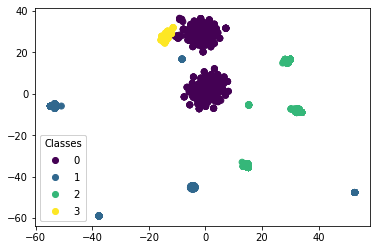

In [26]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels[::150])

legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend)

plt.show()

Видим, что имена вакансий и категории находятся рядом и в сплоченных кластерах, а вот айди опыта и расписания - раскинуты.

**Задание 15. (0.5 балла)** Поиск новых фактов.

С помощью функций [discover_facts, query_topn](https://docs.ampligraph.org/en/1.3.2/ampligraph.discovery.html) попробуйте попредсказывать факты для различных сущностей и отношений, которые вы использовали при обучении.

Получилось ли открыть что-то интересное?


In [27]:
from ampligraph.discovery import discover_facts

In [28]:
random_state = 42

In [33]:
discover_facts(data_train, complEx, top_n=3, max_candidates=1000, strategy='random_uniform', target_rel='has_vacancy_type')

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.
WARNING - You are attempting to use 175474 distinct entities to generate synthetic negatives in the evaluation
    protocol. This may be unnecessary and will lead to a 'harder' task. Besides, it will lead to a much slower
    evaluation procedure. We recommended to set the 'corruption_entities' argument to a reasonably sized set
    of entities. The size of corruption_entities depends on your domain-specific task.


/usr/local/lib/python3.6/dist-packages/ampligraph/evaluation/protocol.py:707: UserWarning: You are attempting to use 175474 distinct entities to generate synthetic negatives in the evaluation
    protocol. This may be unnecessary and will lead to a 'harder' task. Besides, it will lead to a much slower
    evaluation procedure. We recommended to set the 'corruption_entities' argument to a reasonably sized set
    of entities. The size of corruption_entities depends on your domain-specific task.
  warnings.warn(warn_msg % ent_for_corruption_size)
100%|██████████| 1000/1000 [12:05<00:00,  1.38it/s]


(array([], shape=(0, 3), dtype=object), array([], dtype=float64))

Так, что-то ничего интересного он не нашел :( 